In [1]:
#librries we want to import
import csv
import pandas as pd
#when I use tab delimiter it shifts everthing to the right.
health_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [2]:
health_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#ID does not really define a sample 
health_data2 = health_data.drop(columns=['id'])

In [4]:
health_data2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

#get dummies is just the fater way for one hot encoding 
one_hot_enc = pd.get_dummies(health_data2)

#Then we drop any data that have nan or na
one_hot_enc = one_hot_enc.dropna()

one_hot_enc

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,1,0,0,1,...,0,0,0,1,1,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [6]:
#iloc[:,#] specifies if you want to store cloumn. Without the "," it will look at the rows.
#5 represents the stroke column
stroke_column = one_hot_enc.iloc[:,5]
one_hot_enc = one_hot_enc.drop(columns=['stroke'])

#Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(one_hot_enc, stroke_column, random_state=42)
pd.DataFrame(X_train)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
795,31.0,0,0,103.55,20.5,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3031,2.0,0,1,62.89,29.4,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
2438,60.0,0,0,114.34,30.3,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2043,18.0,0,0,108.87,21.5,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2032,54.0,0,0,100.29,30.2,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,19.0,0,0,89.30,22.1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
511,51.0,0,0,82.93,29.7,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
3247,53.0,0,0,90.65,22.1,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3946,11.0,0,0,93.51,20.8,1,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0


In [7]:
# 1.) Train a Decision Tree, Random Forest and Gradient Boosting algorithm to set a
# baseline performance. Use ROC AUC and Average Precision metrics for your evaluation.
# Also, show the precision and recall for both classes. Don’t balance the dataset.

## 1.) Decision Trees
import sklearn.metrics as metrics
from sklearn import tree
import numpy as np    
import matplotlib.pyplot as plt 

dec_tree = tree.DecisionTreeClassifier(max_depth=4)

dec_tree = dec_tree.fit(X_train, y_train)

pd.DataFrame(X_train)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
795,31.0,0,0,103.55,20.5,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3031,2.0,0,1,62.89,29.4,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
2438,60.0,0,0,114.34,30.3,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2043,18.0,0,0,108.87,21.5,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2032,54.0,0,0,100.29,30.2,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,19.0,0,0,89.30,22.1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
511,51.0,0,0,82.93,29.7,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
3247,53.0,0,0,90.65,22.1,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3946,11.0,0,0,93.51,20.8,1,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0


In [8]:
dec_tree.score(X_train, y_train)

0.9625101874490628

[Text(167.4, 195.696, 'X[0] <= 66.5\ngini = 0.076\nsamples = 3681\nvalue = [3535, 146]'),
 Text(83.7, 152.208, 'X[0] <= 44.5\ngini = 0.037\nsamples = 3065\nvalue = [3008, 57]'),
 Text(41.85, 108.72, 'X[3] <= 58.115\ngini = 0.006\nsamples = 1859\nvalue = [1853, 6]'),
 Text(20.925, 65.232, 'X[3] <= 58.06\ngini = 0.077\nsamples = 50\nvalue = [48, 2]'),
 Text(10.4625, 21.744, 'gini = 0.04\nsamples = 49\nvalue = [48, 1]'),
 Text(31.387500000000003, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(62.775000000000006, 65.232, 'X[0] <= 38.5\ngini = 0.004\nsamples = 1809\nvalue = [1805, 4]'),
 Text(52.3125, 21.744, 'gini = 0.0\nsamples = 1507\nvalue = [1507, 0]'),
 Text(73.2375, 21.744, 'gini = 0.026\nsamples = 302\nvalue = [298, 4]'),
 Text(125.55000000000001, 108.72, 'X[3] <= 185.085\ngini = 0.081\nsamples = 1206\nvalue = [1155, 51]'),
 Text(104.625, 65.232, 'X[10] <= 0.5\ngini = 0.07\nsamples = 1046\nvalue = [1008, 38]'),
 Text(94.16250000000001, 21.744, 'gini = 0.06\nsamples = 841\

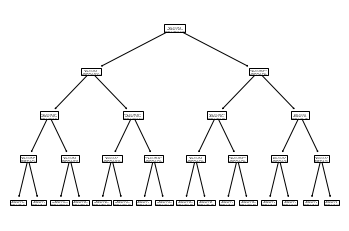

In [9]:
tree.plot_tree(dec_tree)

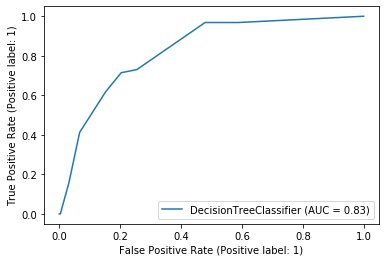

In [10]:
#ROC AUC for decison tree
metrics.plot_roc_curve(dec_tree, X_test, y_test)  
plt.show()  

Text(0.5, 1.0, 'DecisionTreeClassifier(max_depth=4)')

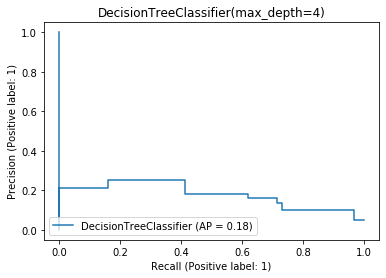

In [11]:
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

#come and check this later for average precision score
disp = plot_precision_recall_curve(dec_tree, X_test, y_test)

disp.ax_.set_title(format(dec_tree))

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import datasets, metrics, model_selection, svm
#Random forest tree
forest_tree = RandomForestClassifier(max_depth=4, random_state=0)
forest_tree.fit(X_train, y_train)
forest_tree.score(X_train, y_train)

0.9603368649823417

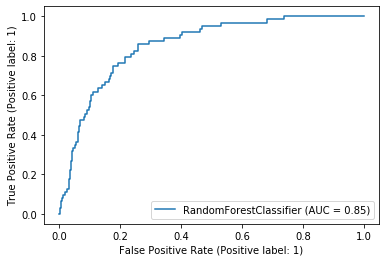

In [13]:
#ROC AUC for decison tree
metrics.plot_roc_curve(forest_tree, X_test, y_test)  
plt.show() 

Text(0.5, 1.0, 'RandomForestClassifier(max_depth=4, random_state=0)')

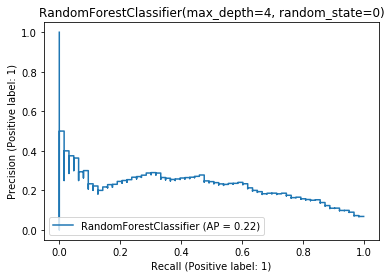

In [14]:
#come and check this later for average precision score
disp = plot_precision_recall_curve(forest_tree, X_test, y_test)

disp.ax_.set_title(format(forest_tree))

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
#Gradient boosting algrithm
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(X_train, y_train)

gradient_boosting.score(X_test, y_test)

0.9486970684039088

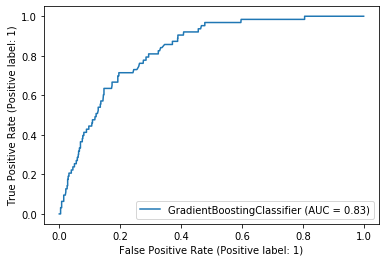

In [16]:
#ROC AUC for decison tree
metrics.plot_roc_curve(gradient_boosting, X_test, y_test)  
plt.show() 

Text(0.5, 1.0, 'GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)')

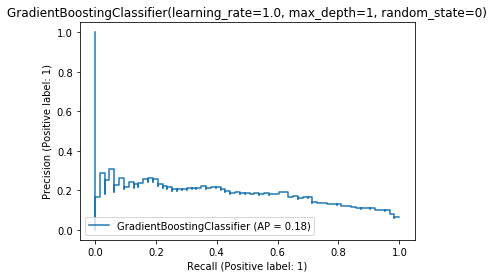

In [17]:
#come and check this later for average precision score
disp = plot_precision_recall_curve(gradient_boosting, X_test, y_test)

disp.ax_.set_title(format(gradient_boosting))

In [18]:
#Q2. Balance the dataset using any 4 methods we have discussed in the class and again train a  Decision  Tree,  
#Random  Forest  and  Gradient  Boosting  algorithm  to  compare  the performance with models from Q1.

from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.model_selection import cross_validate
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(replacement=False)

X_train_subsample, y_train_subsample = rus.fit_resample(X_train, y_train)

print(X_train.shape)
print(X_train_subsample.shape)
print(np.bincount(y_train_subsample))
print(np.bincount(y_train))

(3681, 21)
(292, 21)
[146 146]
[3535  146]


In [19]:
#decision tree random undersample
dec_tree2 = tree.DecisionTreeClassifier(max_depth=4)

dec_tree2 = dec_tree2.fit(X_train_subsample, y_train_subsample)

#score for decision tree random undersample
dec_tree2.score(X_train_subsample, y_train_subsample)

0.7808219178082192

In [20]:
#Random forest tree random undersample
forest_tree2 = RandomForestClassifier(max_depth=4, random_state=0)
forest_tree2.fit(X_train_subsample, y_train_subsample)
forest_tree2.score(X_train_subsample, y_train_subsample)

0.821917808219178

In [21]:
#Ask to see if X_test and y_test are ok here.

#Gradient boosting algrithm for random undersample
gradient_boosting2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(X_train_subsample, y_train_subsample)

gradient_boosting2.score(X_test, y_test)

0.6604234527687296

In [22]:
#find the important features using radom forest. 
pd.DataFrame(forest_tree2.feature_importances_)

,0
0,0.321470
1,0.049695
2,0.049968
3,0.198966
4,0.133902
5,0.007777
6,0.009706
7,0.000000
8,0.037059
9,0.044073


In [23]:
#here, the important features are shown when using gradient boosting but idk which ones they are.
pd.DataFrame(gradient_boosting2.feature_importances_)

,0
0,0.581533
1,0.000000
2,0.001111
3,0.268285
4,0.118320
5,0.000000
6,0.000000
7,0.000000
8,0.006302
9,0.000000


In [ ]:
#Q4 Write  a  brief  report  on how  different  data  balancing  techniques  improved  the performance of your models.

# The method that I used to balanced data is random undersampling. Random undersampling 
# reduces number of rows in the majority class so that they match minoirty class. 
# Overall random undersampling blanced the data out, but gradient boosting accuracy dropped from 94% to 66%.
# The average score showed 94% and when changing the algirhtm using random undersampling it showed that
# there was a lot of weak data that was being used.
# The same happened with both decison tree and random forest tree. the average score for the random forest tree algorithm
# originally produced 96% percent accuracy, and then implementing the random undersampling algorithm it showed 82% acurracy.
# This is still good because I am still able to show a solid accuracy whihc shows the advantage of using random forest tree.
# The Decision tree algorithm average score showed 96% accuracy, and using random undersampling after showed 78% accuracy.
# Finally overall as said before using random undersmapling took out the weaker data and showed the new accuracy.
# random undersampling is extremley useful when trying to understand what features or what records these featrues have
# are important. This assignmetn has taught me how to implemtn new algorithms as well as having different methods to use to 
# test data that can matter a lot. Esopecially when we are using algorithms for prediction.